> **Note**: This calculation does not support `jax`. *[jan25]*

In [296]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
import numpy as np
import os
from classy_sz import Class as Class_sz

**Cosmological parameters**

In [297]:
cosmo_params= {
'omega_b': 0.02,
'omega_cdm':  0.12,
'H0': 80., 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665, 
"cosmo_model": 0, # use mnu-lcdm emulators
"B":1.2
}

**Precision parameters**

In [298]:
precision_params = {
'x_outSZ': 4., # truncate profile beyond x_outSZ*r_s

'n_m_pressure_profile' :50, # default: 100, decrease for faster
'n_z_pressure_profile' :50, # default: 100, decrease for faster
    

'use_fft_for_profiles_transform' : 1, # use fft's or not. 
# only used if use_fft_for_profiles_transform set to 1
'N_samp_fftw' : 1024*32,
'x_min_gas_pressure_fftw' : 1e-4,
'x_max_gas_pressure_fftw' : 1e6,
    
    
'ndim_redshifts' :500,

    
'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0001,    

    
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0001
}

## Generalized NFW pressure profile

In [299]:
%%time

classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set(precision_params)
classy_sz.set({

'output': 'tSZ_tSZ_1h,tSZ_tSZ_2h',
    
"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
 

'mass_function' : 'T08M500c',



'pressure_profile':'GNFW', # can be Battaglia, Arnaud, etc
    
"P0GNFW": 8.130,
"c500": 1.156,
"gammaGNFW": 0.3292,
"alphaGNFW": 1.0620,
"betaGNFW":5.4807,
    



})
classy_sz.compute_class_szfast()

CPU times: user 35.9 s, sys: 865 ms, total: 36.7 s
Wall time: 4.49 s


In [300]:
classy_sz.pars

{'output': 'tSZ_tSZ_1h,tSZ_tSZ_2h',
 'skip_input': 0,
 'skip_background_and_thermo': 0,
 'skip_pknl': 0,
 'skip_pkl': 0,
 'skip_chi': 1,
 'skip_hubble': 1,
 'skip_class_sz': 0,
 'skip_sigma8_at_z': 1,
 'skip_sigma8_and_der': 0,
 'skip_cmb': 1,
 'cosmo_model': 0,
 'jax': 0,
 'classy_sz_verbose': 'none',
 'non_linear': 'hmcode',
 'ndim_masses': 500,
 'ndim_redshifts': 500,
 'sBBN file': '/Users/licongxu/class_sz_data_directory/class_sz/class-sz//bbn/sBBN_2017.dat',
 'A10_file': '/Users/licongxu/class_sz_data_directory/class_sz/class-sz//class_sz_auxiliary_files/includes/class_sz_lnIgnfw-and-d2lnIgnfw-vs-lnell-over-ell500_A10.txt',
 'P13_file': '/Users/licongxu/class_sz_data_directory/class_sz/class-sz//class_sz_auxiliary_files/includes/class_sz_lnIgnfw-and-d2lnIgnfw-vs-lnell-over-ell500_P13.txt',
 'Tinker_et_al_10_alpha_consistency_msyriac_file': '/Users/licongxu/class_sz_data_directory/class_sz/class-sz//class_sz_auxiliary_files/includes/Tinker_et_al_10_alpha_consistency_msyriac.txt',
 

In [301]:
l = np.asarray(classy_sz.cl_sz()['ell'])
cl_yy_1h = np.asarray(classy_sz.cl_sz()['1h'])
cl_yy_2h = np.asarray(classy_sz.cl_sz()['2h'])

In [305]:
cl_yy_1h
l

array([2.00000000e+00, 2.44280552e+00, 2.98364940e+00, 3.64423760e+00,
       4.45108186e+00, 5.43656366e+00, 6.64023385e+00, 8.11039993e+00,
       9.90606485e+00, 1.20992949e+01, 1.47781122e+01, 1.80500270e+01,
       2.20463528e+01, 2.69274761e+01, 3.28892935e+01, 4.01710738e+01,
       4.90650604e+01, 5.99282001e+01, 7.31964689e+01, 8.94023690e+01,
       1.09196300e+02, 1.33372662e+02, 1.62901737e+02, 1.98968631e+02,
       2.43020835e+02, 2.96826318e+02, 3.62544484e+02, 4.42812832e+02,
       5.40852815e+02, 6.60599120e+02, 8.06857587e+02, 9.85498082e+02,
       1.20369008e+03, 1.47019038e+03, 1.79569458e+03, 2.19326632e+03,
       2.67886153e+03, 3.27196886e+03, 3.99639179e+03, 4.88120396e+03,
       5.96191597e+03, 7.28190061e+03])

/Users/licongxu/envs/jax_env/lib/python3.12/site-packages/matplotlib/dviread.py:1038: ResourceWarning: unclosed file <_io.BufferedWriter name=87>
  self._proc = self._new_proc()
/Users/licongxu/envs/jax_env/lib/python3.12/site-packages/matplotlib/dviread.py:1038: ResourceWarning: unclosed file <_io.BufferedReader name=88>
  self._proc = self._new_proc()


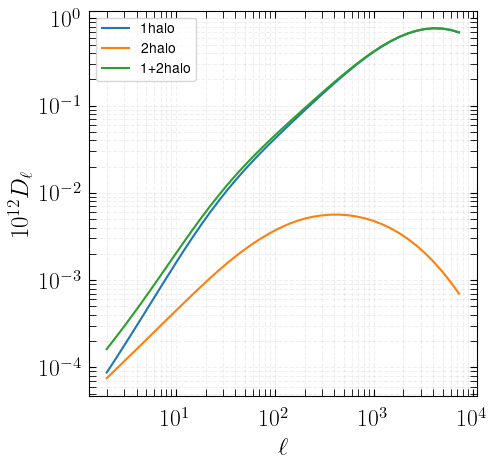

In [303]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$10^{12}D_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')
ax.legend()

## Arnaud et al 2010 tabulated profile

In [304]:
%%time
classy_sz_A10 = Class_sz()
classy_sz_A10.set(cosmo_params)
classy_sz_A10.set(precision_params)
classy_sz_A10.set({

'output': 'tSZ_1h,tSZ_2h',
    
"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
 

'mass_function' : 'T08M500c',

'pressure_profile':'A10', # can be Battaglia, Arnaud, etc

})
classy_sz_A10.compute_class_szfast()

/Users/licongxu/envs/jax_env/lib/python3.12/site-packages/IPython/core/magics/execution.py:1355: DeprecationWarning: compute_class_szfast is deprecated. Use initialize_classy_szfast instead.
  out = eval(code_2, glob, local_ns)


KeyboardInterrupt: 

In [ ]:
l_A10 = np.asarray(classy_sz_A10.cl_sz()['ell'])
cl_yy_1h_A10 = np.asarray(classy_sz_A10.cl_sz()['1h'])
cl_yy_2h_A10 = np.asarray(classy_sz_A10.cl_sz()['2h'])
cl_yy_1h_A10

array([9.79291123e-05, 1.38309570e-04, 1.96338578e-04, 2.79790409e-04,
       3.99696868e-04, 5.71547857e-04, 8.16806175e-04, 1.16468401e-03,
       1.65395404e-03, 2.33442317e-03, 3.26748055e-03, 4.52548039e-03,
       6.18977580e-03, 8.34824707e-03, 1.10938366e-02, 1.45264781e-02,
       1.87605210e-02, 2.39373769e-02, 3.02408709e-02, 3.79143644e-02,
       4.72701099e-02, 5.87007941e-02, 7.26819536e-02, 8.97720098e-02,
       1.10603138e-01, 1.35863656e-01, 1.66260252e-01, 2.02458647e-01,
       2.44990493e-01, 2.94122623e-01, 3.49692308e-01, 4.10918069e-01,
       4.76220284e-01, 5.43092838e-01, 6.07933253e-01, 6.66844476e-01,
       7.15196833e-01, 7.48174503e-01, 7.62243927e-01, 7.55152079e-01,
       7.26555427e-01, 6.78180408e-01])

In [ ]:
A10 = cl_yy_1h_A10
GNFW = cl_yy_1h
A10/GNFW

array([1.12179586, 1.11886896, 1.11495911, 1.10988462, 1.10348336,
       1.09575291, 1.08695174, 1.07757565, 1.06832055, 1.0599326 ,
       1.05303271, 1.04793937, 1.04445431, 1.04192428, 1.03965365,
       1.03733682, 1.03504356, 1.0329378 , 1.03116088, 1.02972456,
       1.02855354, 1.02746624, 1.02631227, 1.02496709, 1.02335122,
       1.02144488, 1.01927005, 1.01689599, 1.01449071, 1.01196863,
       1.00962538, 1.00747736, 1.00555504, 1.00377995, 1.0018008 ,
       1.00002548, 0.99847754, 0.99589141, 0.99319571, 0.99020305,
       0.98706365, 0.98400616])

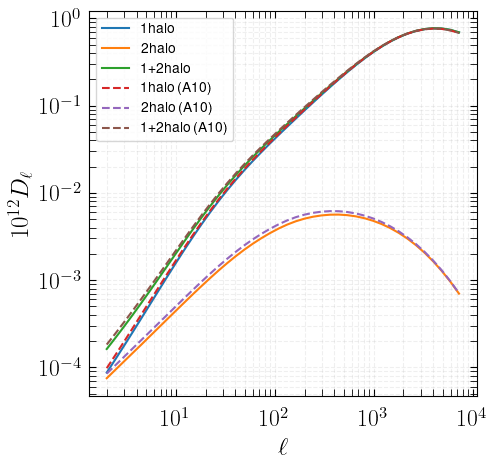

In [ ]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$10^{12}D_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')

ax.plot(l_A10,cl_yy_1h_A10,label='1halo (A10)',ls='--')
ax.plot(l_A10,cl_yy_2h_A10,label='2halo (A10)',ls='--')
ax.plot(l_A10,cl_yy_2h_A10+cl_yy_1h_A10,label='1+2halo (A10)',ls='--')
ax.legend()

## Battaglia et al 2012 pressure profile

In [ ]:
%%time
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set(precision_params)
classy_sz.set({

'output': 'tSZ_1h,tSZ_2h',
    
"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
 

'mass_function' : 'T08M200c',

'pressure_profile':'B12', # can be Battaglia, Arnaud, etc
'concentration_parameter':"D08",

})
classy_sz.compute_class_szfast()

KeyboardInterrupt: 

In [ ]:
l = np.asarray(classy_sz.cl_sz()['ell'])
cl_yy_1h = np.asarray(classy_sz.cl_sz()['1h'])
cl_yy_2h = np.asarray(classy_sz.cl_sz()['2h'])

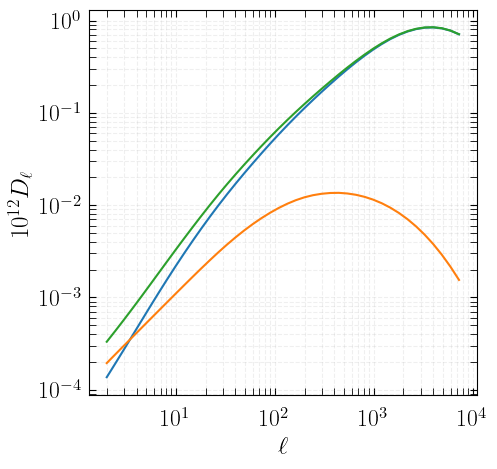

In [ ]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$10^{12}D_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')



## Trispectrum and Covariance Matrix Calculation

Set sky-fraction:

In [ ]:
fsky = 1.

Multipole range:

In [ ]:
ell_min = 100
ell_max = 8000
dlogell = 0.2

In [ ]:
%%time
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set(precision_params)
classy_sz.set({

'output': 'tSZ_1h,tSZ_Trispectrum',
    
"ell_min" : ell_min,
"ell_max" : ell_max,
'dell': 0.,
'dlogell': dlogell,
    
# 'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
 

'mass_function' : 'T08M500c',
'pressure_profile':'A10', 


})
classy_sz.compute_class_szfast()

CPU times: user 19.1 s, sys: 193 ms, total: 19.3 s
Wall time: 2.23 s


Determine number fo modes in each bins:


In [ ]:
l = np.asarray(classy_sz.cl_sz()['ell'])

In [ ]:
l

array([ 100.        ,  122.14027582,  149.18246976,  182.21188004,
        222.55409285,  271.82818285,  332.01169227,  405.51999668,
        495.30324244,  604.96474644,  738.90560989,  902.50134994,
       1102.31763806, 1346.3738035 , 1644.46467711, 2008.55369232,
       2453.25301971, 2996.41000474, 3659.82344437, 4470.11844933,
       5459.81500331, 6668.63310409])

In [ ]:
bin_edges = np.sqrt(l[:-1] * l[1:])
bin_edges = np.concatenate(([ell_min], bin_edges, [ell_max]))

In [ ]:
all_ls = np.arange(ell_min,ell_max)

In [ ]:
dells , _ = np.histogram(all_ls, bins=bin_edges)

In [ ]:
%%time


dl_yy_1h = np.asarray(classy_sz.cl_sz()['1h'])
tllprime_sz = classy_sz.tllprime_sz().copy() # note: sqrt(T_ll') ~ 10^12 y^2 ~ C_l 
tllp = np.zeros((len(l),len(l)))
mllp = np.zeros((len(l),len(l)))
mllpG = np.zeros((len(l),len(l)))
for il in range(len(l)):
    for ilp in range(len(l)):
        lil =l[il]
        lilp = l[ilp]
        dell = dells[il]
        sig_gauss_l = np.sqrt(2./(2*lil+1.))*dl_yy_1h[il]/np.sqrt(dell*fsky)
        if il == ilp:
            mllp[il][ilp] = (sig_gauss_l*sig_gauss_l+lil*(lil+1.)/2./np.pi*lilp*(lilp+1.)/2./np.pi*tllprime_sz[il][ilp]/4./np.pi/fsky)*1e-24
            mllpG[il][ilp] = (sig_gauss_l*sig_gauss_l)*1e-24
        else:
            mllp[il][ilp] = lil*(lil+1.)/2./np.pi*lilp*(lilp+1.)/2./np.pi*tllprime_sz[il][ilp]/4./np.pi/fsky*1e-24
        tllp[il][ilp] = lil*(lil+1.)/2./np.pi*lilp*(lilp+1.)/2./np.pi*tllprime_sz[il][ilp]*1e-24

CPU times: user 1.66 ms, sys: 54 μs, total: 1.71 ms
Wall time: 1.7 ms


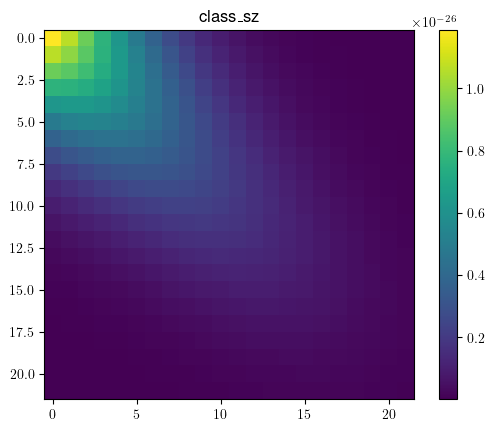

In [ ]:
plt.imshow(tllp)
plt.title("class_sz")
plt.colorbar()

(100, 10000)

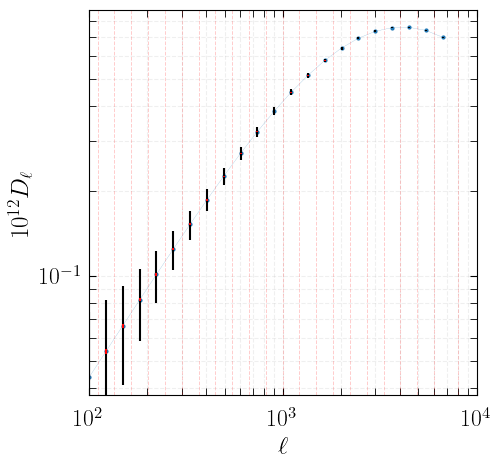

In [ ]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$10^{12}D_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(l,dl_yy_1h,label='1halo',marker='o',markersize=2.,lw=0.1)
for edge in bin_edges:
    ax.axvline(edge, color='red', linestyle='--', linewidth=0.7,alpha=0.2)  # Customize as needed

yerrG = np.sqrt(np.diag(mllpG))
yerrTOT = np.sqrt(np.diag(mllp))
ax.errorbar(l,dl_yy_1h,yerr=1e12*yerrTOT,ls='None',c='k')
ax.errorbar(l,dl_yy_1h,yerr=1e12*yerrG,ls='None',c='r')
ax.set_xlim(100,10000)

Note that the Gaussian contribution in first bin here only accounts for half the number of modes. Either truncate it, or ammend the code above.  

## Mass and redshift dependence of integrand

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
import numpy as np
import os
from classy_sz import Class as Class_sz

In [ ]:
cosmo_params= {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,  
}

In [ ]:
precision_params = {
'x_outSZ': 4., # truncate profile beyond x_outSZ*r_s
'use_fft_for_profiles_transform' : 1, # use fft's or not. 
# only used if use_fft_for_profiles_transform set to 1
'N_samp_fftw' : 512,
'x_min_gas_pressure_fftw' : 1e-4,
'x_max_gas_pressure_fftw' : 1e4,
}

In [ ]:
zmin = 0.001
zmax = 5.
mmin = 1e11 # msun /h 
mmax = 5e15 # msun / h

In [ ]:
%%time

classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set(precision_params)
classy_sz.set({

'output': 'tSZ_tSZ_1h',
    
"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'z_min' : zmin,
'z_max' : zmax,
'M_min' : mmin, 
'M_max' : mmax,
 

'mass_function' : 'T08M500c',



'pressure_profile':'custom_gnfw', # can be Battaglia, Arnaud, etc
    
"P0GNFW": 8.130,
"c500": 1.156,
"gammaGNFW": 0.3292,
"alphaGNFW": 1.0620,
"betaGNFW":5.4807,
    
"cosmo_model": 0, # lcdm with Mnu=0.06ev fixed

})
classy_sz.compute_class_szfast()


CPU times: user 8.02 s, sys: 55.3 ms, total: 8.08 s
Wall time: 998 ms


In [ ]:
l = np.asarray(classy_sz.cl_sz()['ell'])
cl_yy_1h = np.asarray(classy_sz.cl_sz()['1h'])
cl_yy_2h = np.asarray(classy_sz.cl_sz()['2h'])

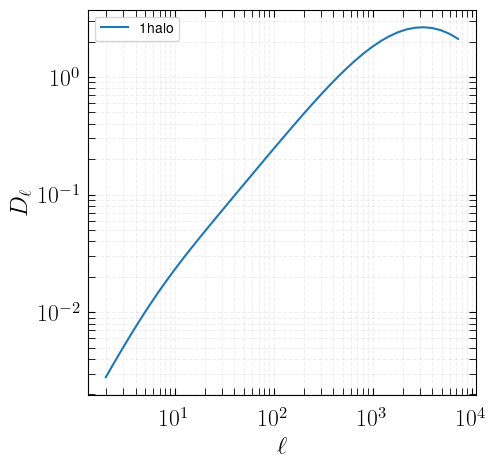

In [ ]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$D_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e4)
# ax.set_xlim(5e-2,1e1)
ax.plot(l,cl_yy_1h,label='1halo')
# # plt.xlim(2e-2,4e1)
# plt.ylim(1e-2,1e4)
ax.legend()

In [ ]:
%%time
dyl2dzdlnm = np.vectorize(classy_sz.get_dyl2dzdlnm_at_z_and_m)
z_array_2d = np.linspace(0.01,2.5,500)
log10m_array = np.linspace(np.log10(1e12),np.log10(1e16),500)
dyl2dzdm_2d = np.zeros((500,500))


dyl2dzdm_2d = np.transpose(dyl2dzdlnm(z_array_2d[None,:],10**log10m_array[:,None],l=500))

CPU times: user 714 ms, sys: 9.86 ms, total: 723 ms
Wall time: 563 ms


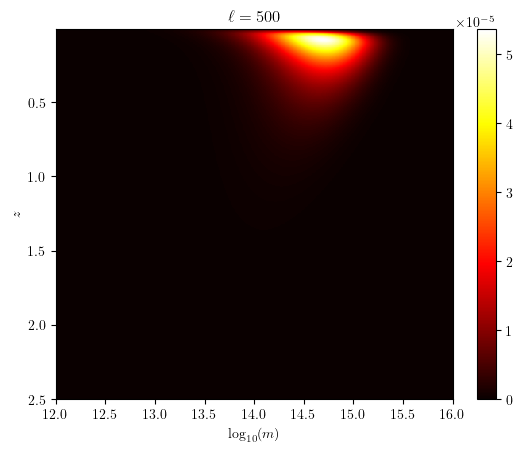

In [ ]:
im = plt.imshow(dyl2dzdm_2d, cmap='hot', interpolation='nearest',
                extent = [12,16,z_array_2d[-1],z_array_2d[0]],
                aspect='auto')
cbar = plt.colorbar(im) # adding the colobar on the right

plt.xlabel(r'$\mathrm{log}_{10}(m)$')
plt.ylabel(r'$z$')
# plt.show()
_ = plt.title(r'$\ell = 500$')


Note that `dyl2dzdm_2d` is weighted by the volume element and halo-mass function. 
It is the integrand of the 1-halo term of the tSZ power spectrum. 

We can also take slices of the 3d plot. 

KeyboardInterrupt: 

/Users/licongxu/envs/jax_env/lib/python3.12/site-packages/matplotlib/dviread.py:1038: ResourceWarning: unclosed file <_io.BufferedWriter name=87>
  self._proc = self._new_proc()
/Users/licongxu/envs/jax_env/lib/python3.12/site-packages/matplotlib/dviread.py:1038: ResourceWarning: unclosed file <_io.BufferedReader name=88>
  self._proc = self._new_proc()


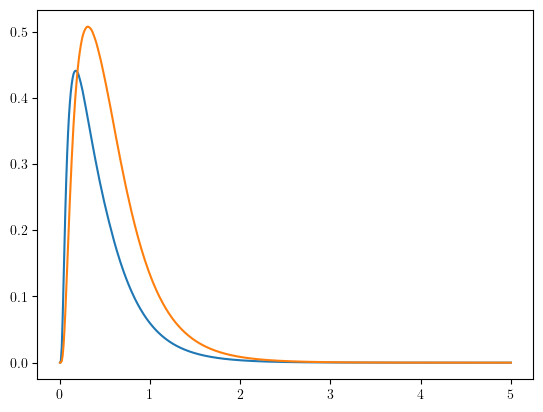

KeyboardInterrupt: 

In [ ]:
nz = 500
nm = 500
zs = np.linspace(zmin,zmax,nz)
ms = np.geomspace(mmin,mmax,nm) 

for l in [500,1000,3000,5000,10000,20000]:
    dlnCldlnz = zs*[np.trapz(dyl2dzdlnm(z,ms,l=l),x=np.log(ms)) for z in zs]
    dlnCldlnz *= 1./np.trapz(dlnCldlnz/zs,x=zs)
    
    plt.plot(zs,dlnCldlnz,label=f'l={l}')
plt.legend()
plt.grid(which='both',alpha=0.5)
_ = plt.xlabel('z')
_ = plt.ylabel('dlnCl/dlnz')
plt.xscale('log')

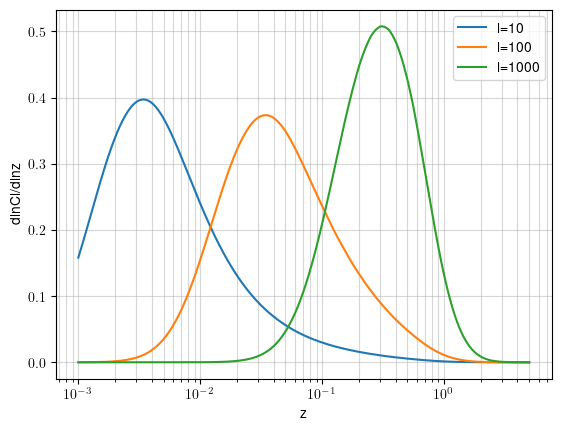

In [ ]:
nz = 500
nm = 500
zs = np.geomspace(zmin,zmax,nz)
ms = np.geomspace(mmin,mmax,nm) 


for l in [10,100,1000]:
    dlnCldlnz = zs*[np.trapz(dyl2dzdlnm(z,ms,l=l),x=np.log(ms)) for z in zs]
    dlnCldlnz *= 1./np.trapz(dlnCldlnz,x=np.log(zs))
    
    plt.plot(zs,dlnCldlnz,label=f'l={l}')
plt.legend()
plt.grid(which='both',alpha=0.5)
_ = plt.xlabel('z')
_ = plt.ylabel('dlnCl/dlnz')
plt.xscale('log')

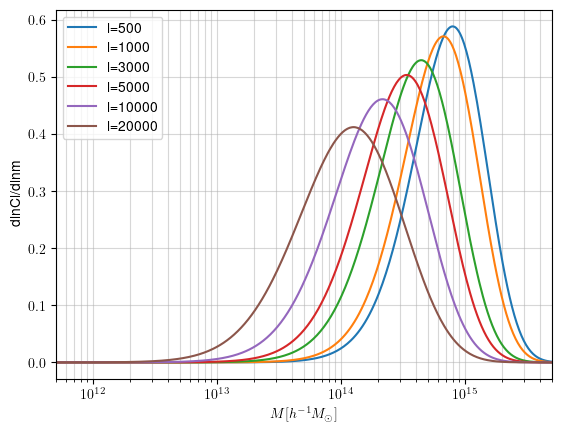

In [ ]:
for l in [500,1000,3000,5000,10000,20000]:
    dlnCldlnm = ms*[np.trapz(dyl2dzdlnm(zs,m,l=l),x=zs) for m in ms]
    dlnCldlnm *= 1./np.trapz(dlnCldlnm/ms,x=ms)
    
    plt.plot(ms,dlnCldlnm,label=f'l={l}')
plt.legend()
plt.grid(which='both',alpha=0.5)
_ = plt.xlabel(r'$M [h^{-1}M_\odot]$')
_ = plt.ylabel('dlnCl/dlnm')
plt.xscale('log')
_ = plt.xlim(5e11,5e15)

# High-precision benchmark calculation

In [ ]:
config = {'H0': 68.0,
 'Ob0': 0.049,
 'Om0': 0.31,
 'ns': 0.965,
 'sigma8': 0.81,
 'm_nu': 0.06,
 'tau_reio': 0.0561,
 'class_sz': {'common_class_sz_settings': {'mass function': 'T08M500c',
   'hm_consistency': 0,
   'concentration parameter': 'B13',
   'cosmo_model': 1,
   'B': 1.0,
   'z_min': 0.0001,
   'z_max': 4.0,
   'redshift_epsrel': '1e-6',
   'redshift_epsabs': '1e-100',
   'M_min': '1e13',
   'M_max': '1e17',
   'mass_epsrel': '1e-6',
   'mass_epsabs': '1e-100',
   'ndim_redshifts': 500,
   'ndim_masses': 500,
   'n_m_dndlnM': 500,
   'n_z_dndlnM': 500,
   'HMF_prescription_NCDM': 1,
   'no_spline_in_tinker': 1,
   'use_m500c_in_ym_relation': 1,
   'use_m200c_in_ym_relation': 0,
   'y_m_relation': 1,
   'output': 'dndlnM,m500c_to_m200c,m200c_to_m500c'},
  'class_sz_ym_params': {'A_ym': 4.8612e-05,
   'B_ym': 0.12,
   'C_ym': 0.0,
   'sigmaM_ym': 0.2,
   'm_pivot_ym_[Msun]': 300000000000000.0,
   'B': 1.0},
  'class_sz_gnfw_params': {'P0GNFW': 8.403,
   'c500': 1.177,
   'gammaGNFW': 0.3081,
   'alphaGNFW': 1.051,
   'betaGNFW': 5.4905,
   'pressure_profile': 'Custom. GNFW'}}}

In [ ]:
class_sz_cosmo_params = {
                        'Omega_b': config['Ob0'],
                        'Omega_cdm':  config['Om0']-config['Ob0'],
                        'H0': config['H0'] ,
                        'sigma8': config['sigma8'],
                        'tau_reio':  config['tau_reio'], ## doesnt matter
                        'n_s': config['ns'],
                        'm_ncdm': config['m_nu'],
                        }

class_sz_clyy_params = {

    'output': config['class_sz']['common_class_sz_settings']['output']+',tSZ_1h,tSZ_2h',
    'ell_max' : 20000,
    'ell_min' : 2,
    'dlogell': 0.1,
    'units for tSZ spectrum': 'dimensionless',
    'x_outSZ': 20,
    'use_fft_for_profiles_transform' : 1,
    'N_samp_fftw' : 32768,
    'x_min_gas_pressure_fftw' : 1e-4,
    'x_max_gas_pressure_fftw' : 1e4,
    'M_min': 1e14*config['H0']/100.,
    'M_max': 1e16*config['H0']/100.,
    'z_min': 0.01,
    'z_max': 3,
                        }

In [ ]:
from classy_sz import Class
cosmo = Class()
cosmo.set(config['class_sz']['common_class_sz_settings'])
cosmo.set(class_sz_cosmo_params)
cosmo.set(config['class_sz']['class_sz_ym_params'])
cosmo.set(config['class_sz']['class_sz_gnfw_params'])
cosmo.set(class_sz_clyy_params)
cosmo.set({
           'ndim_redshifts': 5000,
           'mass_epsrel': 1e-9,})

True

In [ ]:
%%time
cosmo.compute_class_szfast()

/Users/licongxu/envs/jax_env/lib/python3.12/site-packages/IPython/core/magics/execution.py:1342: DeprecationWarning: compute_class_szfast is deprecated. Use initialize_classy_szfast instead.
  out = eval(code, glob, local_ns)


KeyboardInterrupt: 

FileNotFoundError: [Errno 2] No such file or directory: 'cl_sz_class_sz_high_prec.npz'

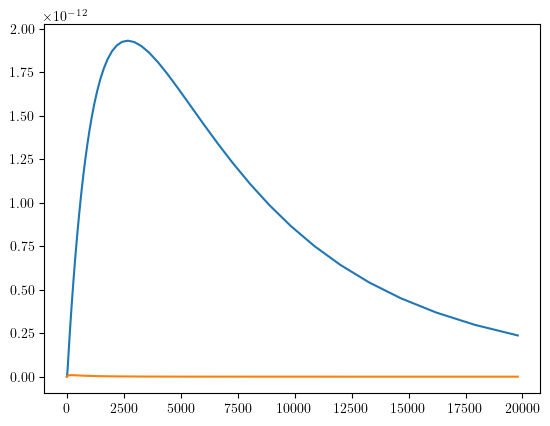

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

cl_sz = cosmo.cl_sz()
plt.plot(cl_sz['ell'], 
         np.array(cl_sz['1h'])*1e-12, 
         label='class_sz 1h')

plt.plot(cl_sz['ell'], 
         np.array(cl_sz['2h'])*1e-12, 
         label='class_sz 2h')

npz_file ='cl_sz_class_sz_high_prec.npz'
# Load the NPZ file
cl_sz_th = np.load(npz_file)
print("Loaded reference data")

plt.loglog(cl_sz_th['ell'], 
           np.array(cl_sz_th['one_h'])*1e-12, 
           ls='--',
           label='class_sz reference 1h')

plt.loglog(cl_sz_th['ell'], 
           np.array(cl_sz_th['two_h'])*1e-12, 
           ls='--',
           label='class_sz reference 2h')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)/2\pi C_\ell^{yy}$')
plt.loglog()
plt.legend()
plt.show()

In [ ]:
np.array(cl_sz_th['two_h'])*1e-12/np.array(cl_sz['2h'])*1e-12

array([1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24])

In [ ]:
np.array(cl_sz_th['one_h'])*1e-12/np.array(cl_sz['1h'])*1e-12

array([1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24,
       1.e-24, 1.e-24, 1.e-24, 1.e-24, 1.e-24])

In [ ]:
cosmo.pars

{'output': 'dndlnM,m500c_to_m200c,m200c_to_m500c,tSZ_1h,tSZ_2h',
 'skip_input': 0,
 'skip_background_and_thermo': 0,
 'skip_pknl': 1,
 'skip_pkl': 0,
 'skip_chi': 1,
 'skip_hubble': 1,
 'skip_class_sz': 0,
 'skip_sigma8_at_z': 1,
 'skip_sigma8_and_der': 0,
 'skip_cmb': 1,
 'cosmo_model': 1,
 'jax': 0,
 'classy_sz_verbose': 'none',
 'ndim_masses': 500,
 'ndim_redshifts': 5000,
 'sBBN file': '/Users/boris/class_sz_data_directory/class_sz/class-sz//bbn/sBBN_2017.dat',
 'A10_file': '/Users/boris/class_sz_data_directory/class_sz/class-sz//class_sz_auxiliary_files/includes/class_sz_lnIgnfw-and-d2lnIgnfw-vs-lnell-over-ell500_A10.txt',
 'P13_file': '/Users/boris/class_sz_data_directory/class_sz/class-sz//class_sz_auxiliary_files/includes/class_sz_lnIgnfw-and-d2lnIgnfw-vs-lnell-over-ell500_P13.txt',
 'Tinker_et_al_10_alpha_consistency_msyriac_file': '/Users/boris/class_sz_data_directory/class_sz/class-sz//class_sz_auxiliary_files/includes/Tinker_et_al_10_alpha_consistency_msyriac.txt',
 'full_p